# Data Description
This dataset contains 77944 images and actions.

The run folders are named run00, run01, etc. Each folder contains a file with the actions called actions.npy, and images img_0000.jpg, img_0001.jpg, etc. The images are all size $240 \times 240 \times 3$, cropped and scaled from a Kinect.

If the run was of $N$ actions, then there are $N$ images in the folder (the final image after is not included) and actions.npy is an array of size $N\times5$. Each action contains these 5 elements: $$(p_x, p_y, \theta, l, g)$$

where:

$p_x$ = x-coordinate of the action in pixels. These are scaled with the images so they could be fractional.

$p_y$ = y-coordinate of the action in pixels

$\theta$ = angle of the action in radians, in world space increasing clockwise with 0 pointing left.

$l$ = length of the action in meters, $l \in [0.01, 0.15]$

$g$ = a Boolean value indicating whether the action should be used for training. If 0, it indicates that it should not; this may be because it is a reset action, or there was an issue planning or executing the intended trajectory.

The data is loaded and visualized below. Note that $\theta$ and $l$ are used to plot actions in the images, but in fact they are in world space, not image space.

In [1]:
import numpy as np
import glob
import scipy.ndimage
import matplotlib.pyplot as plt
import imageio
import math
%matplotlib inline

In [2]:
runs = sorted(glob.glob("run*"))
print("number of training runs", len(runs))

number of training runs 66


In [3]:
# some plotting utilities
def rect(ax, poke, c):
    x, y, t, l, good = poke
    dx = -200 * l * math.cos(t)
    dy = -200 * l * math.sin(t)
    ax.arrow(x, y, dx, dy, head_width=5, head_length=5)

def plot_sample(img_before, img_after, action):
    plt.figure()
    f, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(img_before.copy())
    rect(ax1, action, "blue")
    ax2.imshow(img_after.copy())

In [3]:
train_split = runs[:40]
val_split = runs[40:50]
test_split = runs[50:]

In [10]:
with open('test_img_before.txt', 'w') as f1, open('test_img_after.txt', 'w') as f2, open('test_actions.txt', 'w') as f3:
    for split in test_split:
        imgs = sorted(glob.glob(split + '/*.jpg'))
        actions = glob.glob(split + '/*.npy')
        with open(actions[0], 'rb') as f:
            action = np.load(f)
        
        for idx, img in enumerate(imgs[:-1]):
            f1.write(imgs[idx] + '\n')
            f2.write(imgs[idx+1] + '\n')
            for x in action[idx]:
                f3.write(str(x) + ' ')
            f3.write('\n')

In [11]:
import numpy as np
import lmdb
import caffe


env = lmdb.open('test/poke', map_size=99999999999)

with env.begin(write=True) as txn, open('test_actions.txt', 'r') as f:
    lines = f.readlines()
    # txn is a Transaction object
    for i, line in enumerate(lines):
        if len(line.strip()) == 0:
            continue
        datum = caffe.proto.caffe_pb2.Datum()
        datum.data = line.strip().encode('ascii')  # or .tostring() if numpy < 1.9
        str_id = '{:08}'.format(i)
        txn.put(str_id.encode('ascii'), datum.SerializeToString())

In [49]:
len(lines)

28909

run run13 actions: (2746, 5)


<Figure size 432x288 with 0 Axes>

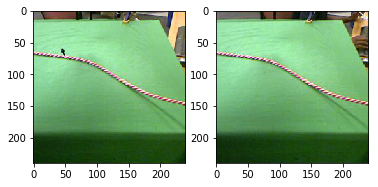

<Figure size 432x288 with 0 Axes>

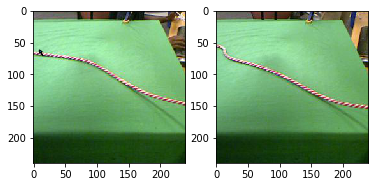

<Figure size 432x288 with 0 Axes>

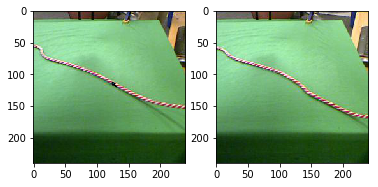

<Figure size 432x288 with 0 Axes>

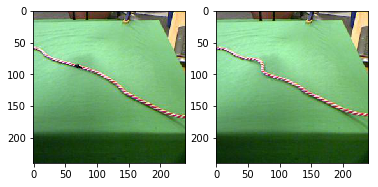

<Figure size 432x288 with 0 Axes>

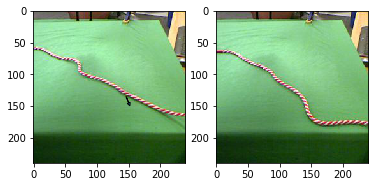

<Figure size 432x288 with 0 Axes>

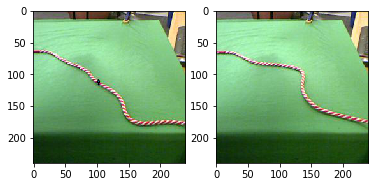

<Figure size 432x288 with 0 Axes>

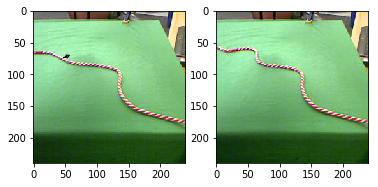

<Figure size 432x288 with 0 Axes>

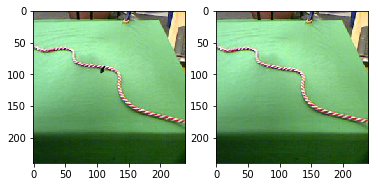

<Figure size 432x288 with 0 Axes>

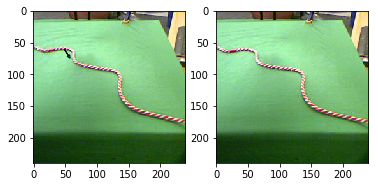

<Figure size 432x288 with 0 Axes>

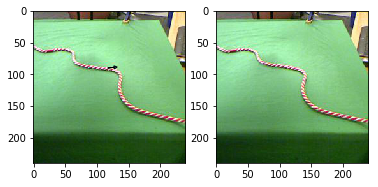

In [6]:
R = 10 # run to inspect
N = 10 # show first N samples

run = runs[R]
img_after = None
actions = np.load(run + "/actions.npy")
print("run", run, "actions:", actions.shape)
for i in range(N):
    img_before = imageio.imread(run + "/img_%04d.jpg"%i)
    img_after = imageio.imread(run + "/img_%04d.jpg"%(i+1))
    plot_sample(img_before, img_after, actions[i, :])

In [10]:
runs = sorted(glob.glob("run*"))
total = 0
for run in runs:
    n_imgs = len(glob.glob(run + '/img*'))
    total += n_imgs
    actions = np.load(run + "/actions.npy")
    print(run, n_imgs, actions.shape)
print(total)

run03 234 (234, 5)
run04 21 (21, 5)
run05 2353 (2353, 5)
run06 1569 (1569, 5)
run07 1481 (1481, 5)
run08 135 (135, 5)
run09 4032 (4032, 5)
run10 578 (578, 5)
run11 1134 (1134, 5)
run12 845 (845, 5)
run13 2746 (2746, 5)
run14 719 (719, 5)
run15 592 (592, 5)
run16 58 (58, 5)
run17 466 (466, 5)
run18 88 (88, 5)
run19 29 (29, 5)
run20 190 (190, 5)
run21 172 (172, 5)
run22 1326 (1326, 5)
run23 457 (457, 5)
run24 84 (84, 5)
run25 15 (15, 5)
run26 150 (150, 5)
run27 219 (219, 5)
run28 373 (373, 5)
run29 115 (115, 5)
run30 22 (22, 5)
run31 423 (423, 5)
run32 38 (38, 5)
run33 8 (8, 5)
run34 168 (168, 5)
run35 3232 (3232, 5)
run36 226 (226, 5)
run37 597 (597, 5)
run38 950 (950, 5)
run39 655 (655, 5)
run40 488 (488, 5)
run41 1632 (1632, 5)
run42 329 (329, 5)
run43 376 (376, 5)
run44 95 (95, 5)
run45 418 (418, 5)
run46 154 (154, 5)
run47 612 (612, 5)
run48 927 (927, 5)
run49 466 (466, 5)
run50 396 (396, 5)
run51 2879 (2879, 5)
run52 504 (504, 5)
run53 73 (73, 5)
run54 373 (373, 5)
run55 1073 (1073

In [ ]:
r = RopeImitator('name', fwd_consist=True)
r.train(10)
